In [18]:
library(dplyr)
library(ggplot2)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [20]:
high_risk <- read.csv("High_Risk.csv")
mid_risk <- read.csv("Mid_Risk.csv")
low_risk <- read.csv("Low_Risk.csv")

In [22]:
head(high_risk)
head(mid_risk)
head(low_risk)

,p.id,p.Age,p.SystolicBP,p.DiastolicBP,p.BS,p.BodyTemp,p.HeartRate,p.RiskLevel
,<chr>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<chr>
1,"""3e0eb10b-362c-46e7-b886-5cd0e76db83e""",25,130,80,15.00,98,86,"""high risk"""
2,"""36e7197f-e0df-4b58-b587-07b95a6cd6a9""",35,140,90,13.00,98,70,"""high risk"""
3,"""fb616da1-ed39-4a5b-9520-c69ceaa18537""",29,90,70,8.00,100,80,"""high risk"""
4,"""49006777-8cdd-468b-bb09-9fbd5afea6cc""",30,140,85,7.00,98,70,"""high risk"""
5,"""75fdef03-98b4-4486-a42a-f064fa426ce0""",23,140,80,7.01,98,70,"""high risk"""
6,"""55b82315-9378-481a-ae31-70ca4d341667""",35,85,60,11.00,102,86,"""high risk"""


,p.id,p.Age,p.SystolicBP,p.DiastolicBP,p.BS,p.BodyTemp,p.HeartRate,p.RiskLevel
,<chr>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<chr>
1,"""9e64da7f-c969-4ba1-8e8b-8cc083b41939""",32,120,65,6.00,101,76,"""mid risk"""
2,"""953ec69c-3ff3-452a-85ae-6d5e9ed5a906""",23,130,70,7.01,98,78,"""mid risk"""
3,"""22493aff-042b-40b0-8121-6e7c18c0e470""",32,120,90,6.90,98,70,"""mid risk"""
4,"""8bfceebe-1b8e-41be-806d-937e3e65d9d2""",19,120,80,7.00,98,70,"""mid risk"""
5,"""74ed7489-ab4c-4262-b9b2-c59c0a05b3a1""",20,120,75,7.01,100,70,"""mid risk"""
6,"""e595a647-ca1d-4c6e-8d58-50f01525d596""",48,120,80,11.00,98,88,"""mid risk"""


,p.id,p.Age,p.SystolicBP,p.DiastolicBP,p.BS,p.BodyTemp,p.HeartRate,p.RiskLevel
,<chr>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<chr>
1,"""0a7f279a-9e4f-4ba3-96c7-654d30eae349""",35,120,60,6.10,98,76,"""low risk"""
2,"""2dcf3467-6091-42ee-92ea-a27678e87c70""",23,90,60,7.01,98,76,"""low risk"""
3,"""083a62ed-9000-4a32-861e-c93f71edaed4""",25,110,89,7.01,98,77,"""low risk"""
4,"""47b22fda-7a13-45ef-9815-c14fc7333c61""",15,120,80,7.01,98,70,"""low risk"""
5,"""58ce4d13-1e3f-4d16-ab8d-a66699893031""",10,70,50,6.90,98,70,"""low risk"""
6,"""f1fff52c-5840-4c5c-9cd3-fd2a563c71d7""",21,90,65,7.50,98,76,"""low risk"""


In [24]:
all_patients <- bind_rows(
  mutate(high_risk, RiskLevel = "high risk"),
  mutate(mid_risk, RiskLevel = "mid risk"),
  mutate(low_risk, RiskLevel = "low risk")
)


In [26]:
print(colnames(high_risk))
print(colnames(mid_risk))
print(colnames(low_risk))

[1] "p.id"          "p.Age"         "p.SystolicBP"  "p.DiastolicBP"
[5] "p.BS"          "p.BodyTemp"    "p.HeartRate"   "p.RiskLevel"  
[1] "p.id"          "p.Age"         "p.SystolicBP"  "p.DiastolicBP"
[5] "p.BS"          "p.BodyTemp"    "p.HeartRate"   "p.RiskLevel"  
[1] "p.id"          "p.Age"         "p.SystolicBP"  "p.DiastolicBP"
[5] "p.BS"          "p.BodyTemp"    "p.HeartRate"   "p.RiskLevel"  


In [28]:
average_metrics <- all_patients %>%
  group_by(RiskLevel) %>%
  summarise(
    AvgSystolicBP = mean(`p.SystolicBP`, na.rm = TRUE),
    AvgDiastolicBP = mean(`p.DiastolicBP`, na.rm = TRUE),
    AvgBS = mean(`p.BS`, na.rm = TRUE),
    AvgHeartRate = mean(`p.HeartRate`, na.rm = TRUE)
)

In [30]:
print(average_metrics)

# A tibble: 3 × 5
  RiskLevel AvgSystolicBP AvgDiastolicBP AvgBS AvgHeartRate
  <chr>             <dbl>          <dbl> <dbl>        <dbl>
1 high risk          124.           85.1 12.1          76.7
2 low risk           106.           72.5  7.22         72.8
3 mid risk           113.           74.2  7.80         74.2


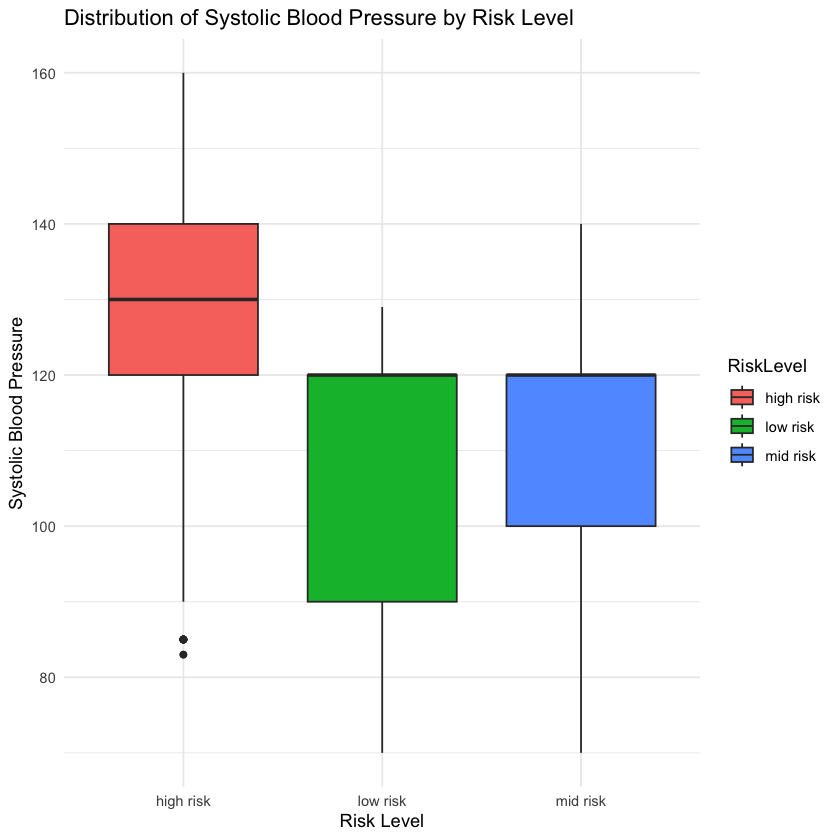

In [32]:
ggplot(all_patients, aes(x = RiskLevel, y = `p.SystolicBP`, fill = RiskLevel)) +
  geom_boxplot() +
  theme_minimal() +
  labs(title = "Distribution of Systolic Blood Pressure by Risk Level",
       x = "Risk Level",
       y = "Systolic Blood Pressure")

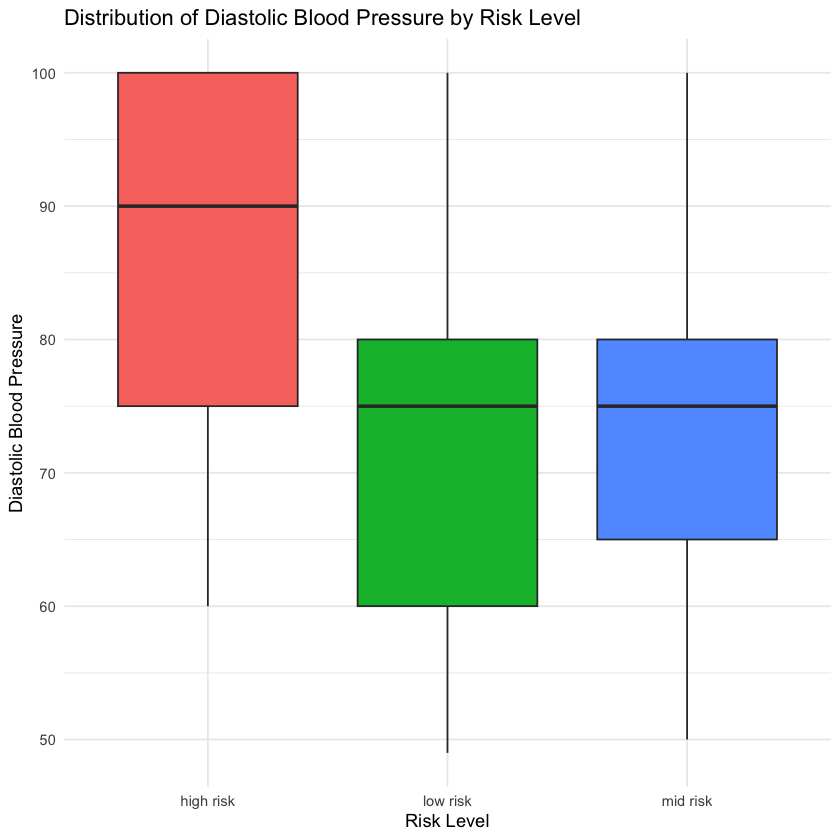

In [34]:
ggplot(all_patients, aes(x = RiskLevel, y = `p.DiastolicBP`, fill = RiskLevel)) +
  geom_boxplot() +
  theme_minimal() +
  labs(title = "Distribution of Diastolic Blood Pressure by Risk Level",
       x = "Risk Level",
       y = "Diastolic Blood Pressure") +
  theme(legend.position = "none")


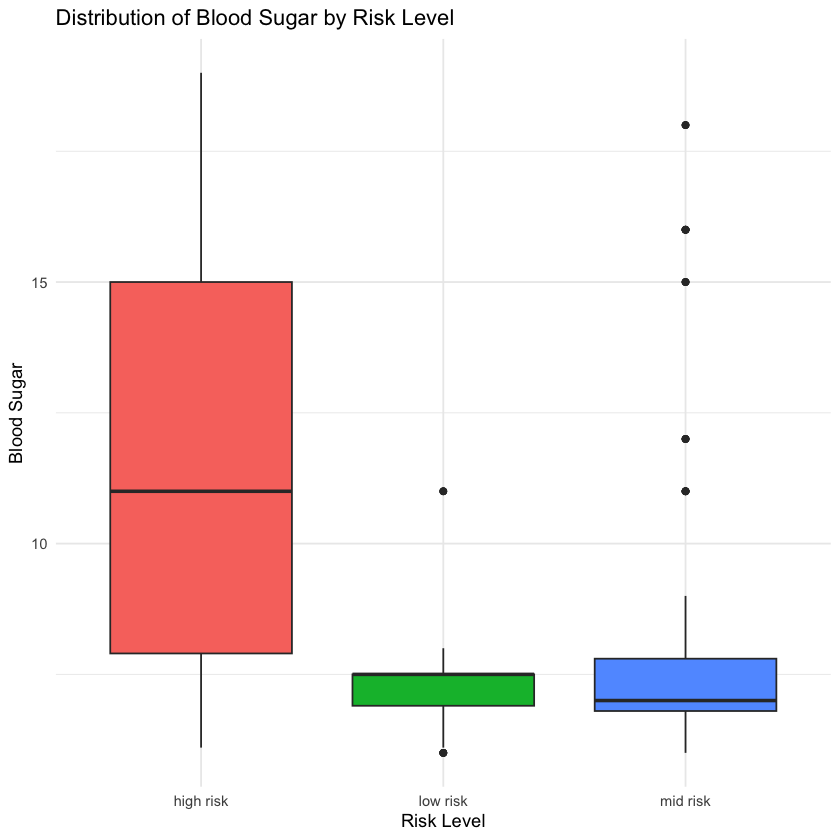

In [36]:
ggplot(all_patients, aes(x = RiskLevel, y = `p.BS`, fill = RiskLevel)) +
  geom_boxplot() +
  theme_minimal() +
  labs(title = "Distribution of Blood Sugar by Risk Level",
       x = "Risk Level",
       y = "Blood Sugar") +
  theme(legend.position = "none")


In [38]:
patient_counts <- all_patients %>%
  group_by(RiskLevel) %>%
  summarise(TotalPatients = n())

print(patient_counts)

# A tibble: 3 × 2
  RiskLevel TotalPatients
  <chr>             <int>
1 high risk           272
2 low risk            406
3 mid risk            336


In [40]:

print("High Risk Patients:")
summary(high_risk)


print("Mid Risk Patients:")
summary(mid_risk)

print("Low Risk Patients:")
summary(low_risk)

[1] "High Risk Patients:"


     p.id               p.Age        p.SystolicBP   p.DiastolicBP   
 Length:272         Min.   :12.00   Min.   : 83.0   Min.   : 60.00  
 Class :character   1st Qu.:25.00   1st Qu.:120.0   1st Qu.: 75.00  
 Mode  :character   Median :35.00   Median :130.0   Median : 90.00  
                    Mean   :36.22   Mean   :124.2   Mean   : 85.07  
                    3rd Qu.:48.00   3rd Qu.:140.0   3rd Qu.:100.00  
                    Max.   :65.00   Max.   :160.0   Max.   :100.00  
      p.BS         p.BodyTemp     p.HeartRate    p.RiskLevel       
 Min.   : 6.10   Min.   : 98.0   Min.   :60.00   Length:272        
 1st Qu.: 7.90   1st Qu.: 98.0   1st Qu.:70.00   Class :character  
 Median :11.00   Median : 98.0   Median :77.00   Mode  :character  
 Mean   :12.12   Mean   : 98.9   Mean   :76.74                     
 3rd Qu.:15.00   3rd Qu.:100.0   3rd Qu.:86.00                     
 Max.   :19.00   Max.   :103.0   Max.   :90.00                     

[1] "Mid Risk Patients:"


     p.id               p.Age        p.SystolicBP   p.DiastolicBP   
 Length:336         Min.   :10.00   Min.   : 70.0   Min.   : 50.00  
 Class :character   1st Qu.:19.00   1st Qu.:100.0   1st Qu.: 65.00  
 Mode  :character   Median :25.00   Median :120.0   Median : 75.00  
                    Mean   :28.36   Mean   :113.2   Mean   : 74.23  
                    3rd Qu.:32.00   3rd Qu.:120.0   3rd Qu.: 80.00  
                    Max.   :60.00   Max.   :140.0   Max.   :100.00  
      p.BS          p.BodyTemp      p.HeartRate    p.RiskLevel       
 Min.   : 6.000   Min.   : 98.00   Min.   :60.00   Length:336        
 1st Qu.: 6.800   1st Qu.: 98.00   1st Qu.:70.00   Class :character  
 Median : 7.000   Median : 98.00   Median :76.00   Mode  :character  
 Mean   : 7.796   Mean   : 98.83   Mean   :74.18                     
 3rd Qu.: 7.800   3rd Qu.:100.00   3rd Qu.:78.00                     
 Max.   :18.000   Max.   :103.00   Max.   :88.00                     

[1] "Low Risk Patients:"


     p.id               p.Age        p.SystolicBP   p.DiastolicBP   
 Length:406         Min.   :10.00   Min.   : 70.0   Min.   : 49.00  
 Class :character   1st Qu.:17.00   1st Qu.: 90.0   1st Qu.: 60.00  
 Mode  :character   Median :22.00   Median :120.0   Median : 75.00  
                    Mean   :26.87   Mean   :105.9   Mean   : 72.53  
                    3rd Qu.:32.00   3rd Qu.:120.0   3rd Qu.: 80.00  
                    Max.   :70.00   Max.   :129.0   Max.   :100.00  
      p.BS         p.BodyTemp      p.HeartRate    p.RiskLevel       
 Min.   : 6.00   Min.   : 98.00   Min.   : 7.00   Length:406        
 1st Qu.: 6.90   1st Qu.: 98.00   1st Qu.:70.00   Class :character  
 Median : 7.50   Median : 98.00   Median :70.00   Mode  :character  
 Mean   : 7.22   Mean   : 98.37   Mean   :72.77                     
 3rd Qu.: 7.50   3rd Qu.: 98.00   3rd Qu.:77.00                     
 Max.   :11.00   Max.   :103.00   Max.   :88.00                     

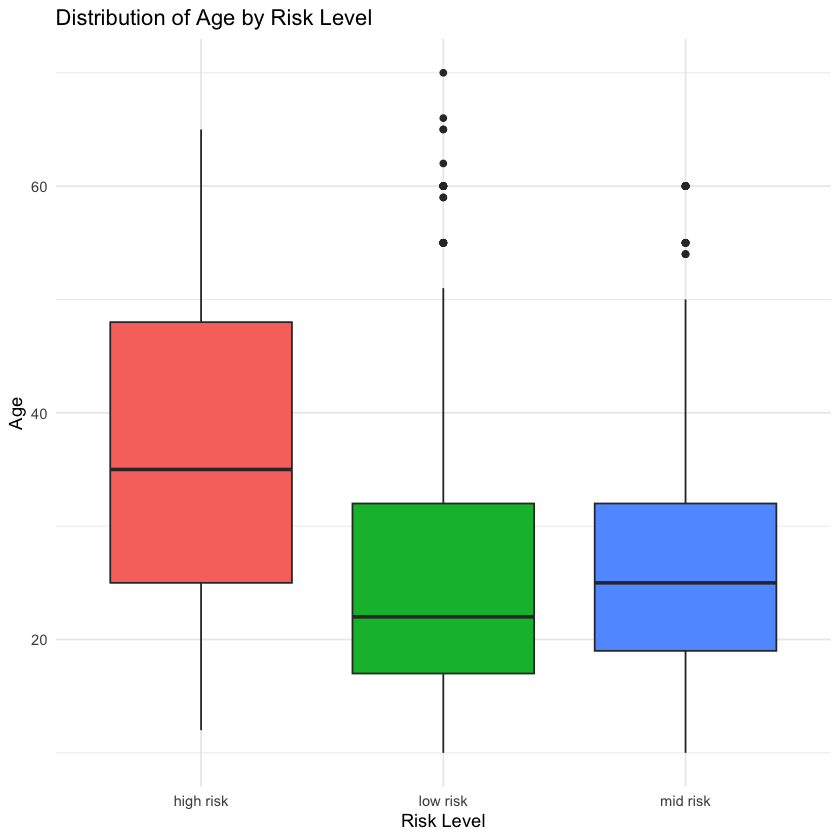

In [42]:
ggplot(all_patients, aes(x = RiskLevel, y = `p.Age`, fill = RiskLevel)) +
  geom_boxplot() +
  theme_minimal() +
  labs(title = "Distribution of Age by Risk Level",
       x = "Risk Level",
       y = "Age") +
  theme(legend.position = "none")

In [44]:
install.packages("corrplot")


The downloaded binary packages are in
	/var/folders/rd/jfxc79756t9g0g5f4ytyb6l40000gn/T//Rtmpnl2Qra/downloaded_packages


In [45]:
library(corrplot)

                    p.Age p.SystolicBP p.DiastolicBP       p.BS  p.BodyTemp
p.Age          1.00000000   0.41604545    0.39802629  0.4732843 -0.25532314
p.SystolicBP   0.41604545   1.00000000    0.78700648  0.4251717 -0.28661552
p.DiastolicBP  0.39802629   0.78700648    1.00000000  0.4238241 -0.25753832
p.BS           0.47328434   0.42517166    0.42382407  1.0000000 -0.10349336
p.BodyTemp    -0.25532314  -0.28661552   -0.25753832 -0.1034934  1.00000000
p.HeartRate    0.07979763  -0.02310796   -0.04615057  0.1428672  0.09877104
RiskLevelNum   0.26722504   0.39647341    0.34664934  0.5699425  0.16398402
              p.HeartRate RiskLevelNum
p.Age          0.07979763    0.2672250
p.SystolicBP  -0.02310796    0.3964734
p.DiastolicBP -0.04615057    0.3466493
p.BS           0.14286723    0.5699425
p.BodyTemp     0.09877104    0.1639840
p.HeartRate    1.00000000    0.1943120
RiskLevelNum   0.19431196    1.0000000


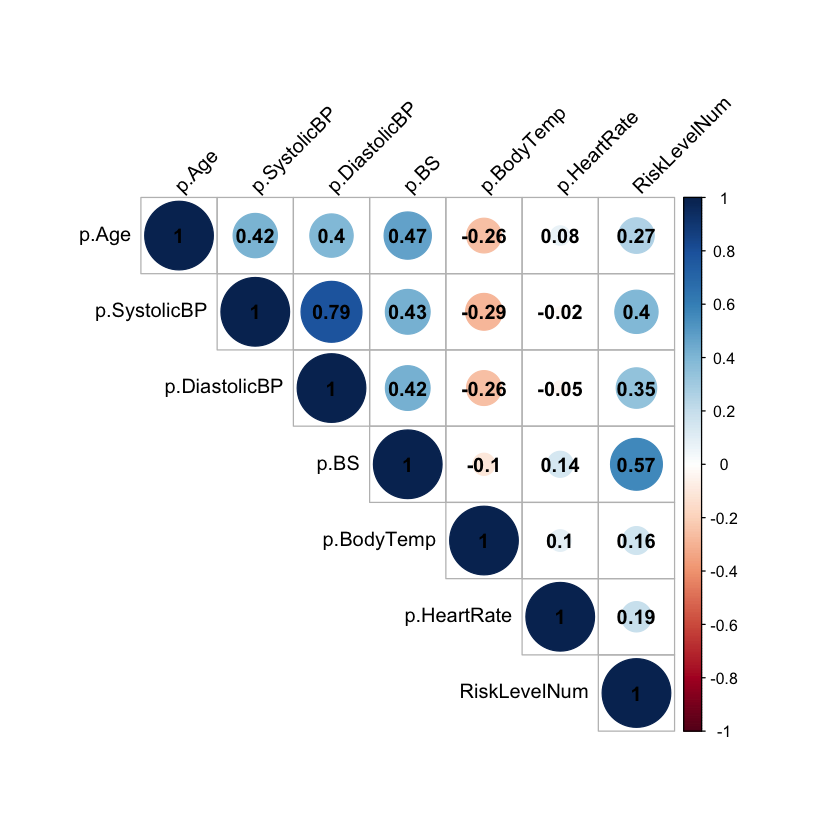

In [46]:
all_patients$RiskLevelNum <- as.numeric(factor(all_patients$RiskLevel, levels = c("low risk", "mid risk", "high risk")))

# Select relevant columns for correlation
numerical_columns <- all_patients %>%
  select(p.Age, p.SystolicBP, p.DiastolicBP, p.BS, p.BodyTemp, p.HeartRate, RiskLevelNum)

# Check for any missing values and handle them if necessary
numerical_columns <- na.omit(numerical_columns)

# Calculate correlation matrix
correlation_matrix <- cor(numerical_columns)
print(correlation_matrix)

# Create a correlation plot
corrplot(correlation_matrix, method = "circle", type = "upper", 
         tl.col = "black", tl.srt = 45, addCoef.col = "black")

In [52]:
fit_multiple <- lm(p.SystolicBP ~ p.Age + p.DiastolicBP + p.BS + p.HeartRate, data = all_patients)


summary(fit_multiple)


Call:
lm(formula = p.SystolicBP ~ p.Age + p.DiastolicBP + p.BS + p.HeartRate, 
    data = all_patients)

Residuals:
    Min      1Q  Median      3Q     Max 
-26.437  -8.051  -0.177   5.678  38.558 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)   34.47787    3.87250   8.903  < 2e-16 ***
p.Age          0.12958    0.03042   4.260 2.24e-05 ***
p.DiastolicBP  0.94856    0.02891  32.811  < 2e-16 ***
p.BS           0.43698    0.12739   3.430 0.000627 ***
p.HeartRate   -0.02007    0.04401  -0.456 0.648446    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 11.12 on 1009 degrees of freedom
Multiple R-squared:  0.6362,	Adjusted R-squared:  0.6347 
F-statistic: 441.1 on 4 and 1009 DF,  p-value: < 2.2e-16


In [56]:
unique(all_patients$p.RiskLevel)

[1] "\"high risk\"" "\"mid risk\""  "\"low risk\""

In [58]:
low_risk <- subset(all_patients, p.RiskLevel == '"low risk"')
mid_risk <- subset(all_patients, p.RiskLevel == '"mid risk"')
high_risk <- subset(all_patients, p.RiskLevel == '"high risk"')

In [60]:
fit_low_age <- lm(p.SystolicBP ~ p.DiastolicBP, data = low_risk)
fit_mid_age <- lm(p.SystolicBP ~ p.DiastolicBP, data = mid_risk)
fit_high_age <- lm(p.SystolicBP ~ p.DiastolicBP, data = high_risk)

In [62]:
print(nrow(low_risk))
print(nrow(mid_risk))
print(nrow(high_risk))

[1] 406
[1] 336
[1] 272


`geom_smooth()` using formula = 'y ~ x'


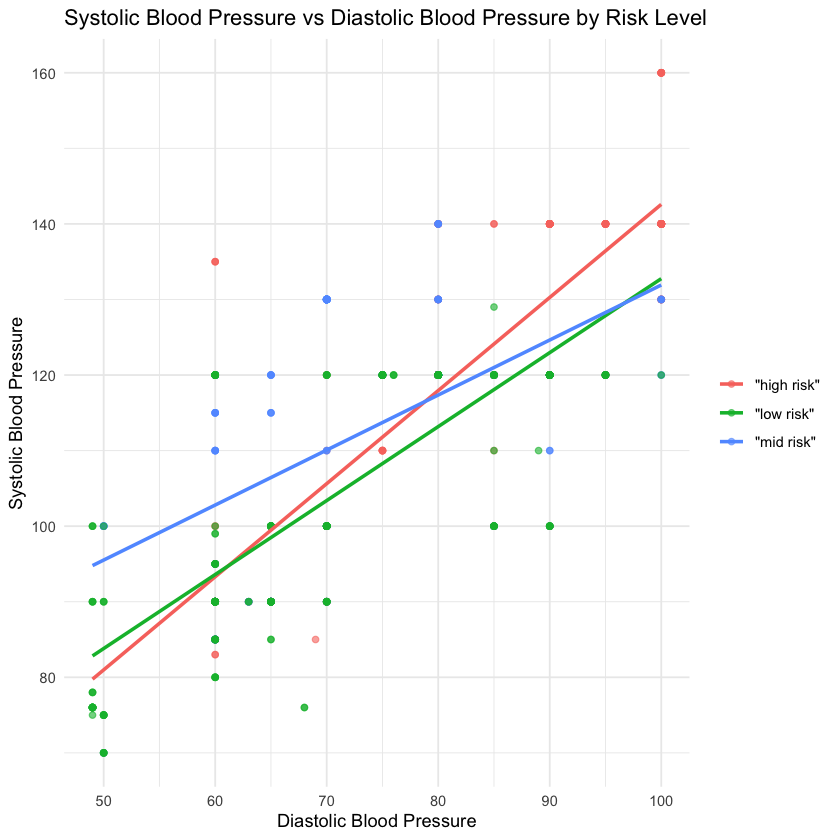

In [64]:
ggplot(all_patients, aes(x = p.DiastolicBP, y = p.SystolicBP, color = p.RiskLevel)) +
  geom_point(alpha = 0.6) +
  geom_smooth(method = "lm", se = FALSE, fullrange = TRUE) +
  labs(title = "Systolic Blood Pressure vs Diastolic Blood Pressure by Risk Level",
       x = "Diastolic Blood Pressure",
       y = "Systolic Blood Pressure") +
  theme_minimal() +
  theme(legend.title = element_blank())

In [66]:
fit_low_risk <- lm(p.BS ~ p.Age, data = low_risk)
fit_mid_risk <- lm(p.BS ~ p.Age, data = mid_risk)
fit_high_risk <- lm(p.BS ~ p.Age, data = high_risk)

In [68]:
all_patients <- bind_rows(
  mutate(high_risk, RiskLevel = "high risk"),
  mutate(mid_risk, RiskLevel = "mid risk"),
  mutate(low_risk, RiskLevel = "low risk")
)

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


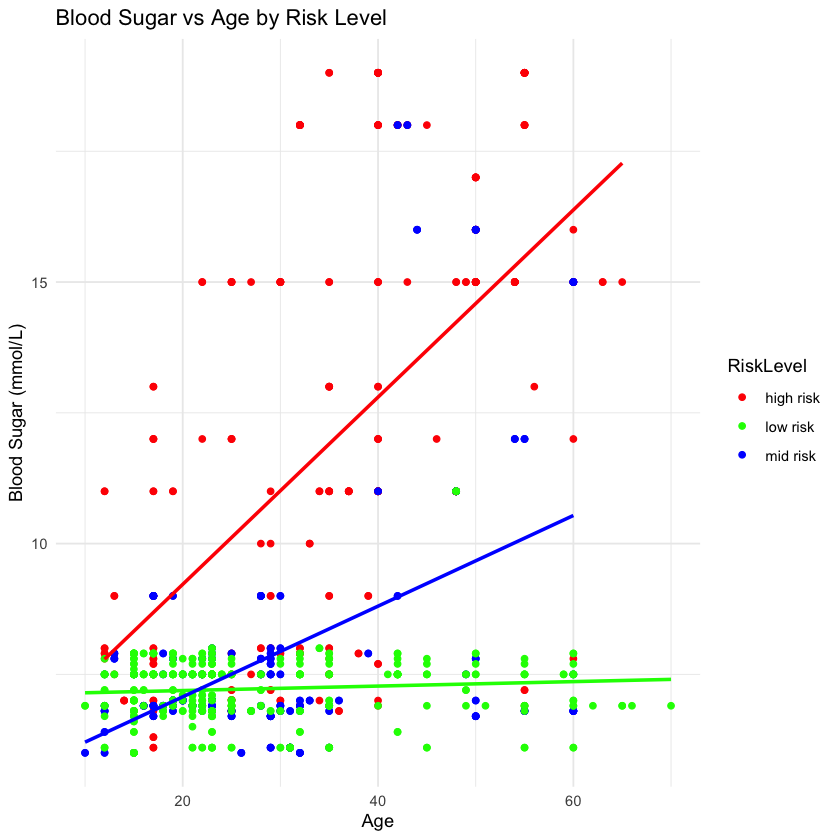

In [70]:
ggplot(all_patients, aes(x = p.Age, y = p.BS, color = RiskLevel)) +
  geom_point() +
  geom_smooth(data = low_risk, method = "lm", se = FALSE, color = "green") +
  geom_smooth(data = mid_risk, method = "lm", se = FALSE, color = "blue") +
  geom_smooth(data = high_risk, method = "lm", se = FALSE, color = "red") +
  theme_minimal() +
  labs(title = "Blood Sugar vs Age by Risk Level",
       x = "Age",
       y = "Blood Sugar (mmol/L)") +
  scale_color_manual(values = c("high risk" = "red", "mid risk" = "blue", "low risk" = "green"))